# Variable Selection for HEADSS+

In this notebook we take HEADSS+ HIV data and run Lasso for variable selection. We examine the longitudinal scenario.

## Load necessary packages

In [ ]:
# Install required packages
install.packages("glmnet")
install.packages("glmmLasso")
install.packages("ROSE")
install.packages("pROC")
install.packages("reshape2")
installed.packages("rpr")
install.packages(
   "ggplot2",
   repos = c("http://rstudio.org/_packages",
   "http://cran.rstudio.com")
)
install.packages("lme4")

# Load required packages
library(grid)
library(glmmLasso)
library(glmnet)
library(ROSE)
library(pROC)
library(dplyr)
require(reshape2)
require(rpr)
library(MASS)
library(nlme)
library(lme4)
library(ggplot2)

## Load Data

In [ ]:

id <- "fileID" # google file ID
df_org <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))

id_comp <- "fileID" # google file ID
df_comp <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id_comp))


In [ ]:
summary(df_comp)

       ID          Timepoint      AgeT         OldYoungT         BoyGirlT     
 Min.   :   10   Min.   :1   Min.   :10.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 6035   1st Qu.:1   1st Qu.:13.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :11390   Median :2   Median :15.00   Median :1.0000   Median :1.0000  
 Mean   :11543   Mean   :2   Mean   :14.92   Mean   :0.5218   Mean   :0.5437  
 3rd Qu.:17082   3rd Qu.:3   3rd Qu.:17.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :56080   Max.   :3   Max.   :23.00   Max.   :1.0000   Max.   :1.0000  
 AdhLastWeekNewT  BodyFeelingsNegAllT ClinicExpAloneAnyT ClinicExpUnsafeAnyT
 Min.   :0.0000   Min.   :0.00000     Min.   :0.00000    Min.   :0.00000    
 1st Qu.:0.0000   1st Qu.:0.00000     1st Qu.:0.00000    1st Qu.:0.00000    
 Median :1.0000   Median :0.00000     Median :0.00000    Median :0.00000    
 Mean   :0.6987   Mean   :0.04039     Mean   :0.07242    Mean   :0.07314    
 3rd Qu.:1.0000   3rd Qu.:0.00000     3rd Qu.:0.00000    3rd Q

In [ ]:
family = binomial(link = 'logit')

In [ ]:
options(warn=-1)
lasso_model <- function(df){
  glm_lasso <- glmmLasso(AdhLastWeekNewT ~ AgeT
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + BodyFeelingsNegAllT
                                    + ClinicExpAloneAnyT
                                    + ClinicExpUnsafeAnyT
                                    + ClinicGetToNoCostT
                                    + ClinicTravelAbv1HrT
                                    + CognitiveIssueAnyT
                                    + DisFeltUpsetT
                                    + DisFriendsAnyT
                                    + DisParentAnyT
                                    + DisPartnerAny_gT
                                    + DisSchoolAnyT
                                    + DoesntKnowViralLoadT
                                    + FutureAllPosT
                                    + HealthHowPoorT
                                    + MedSideEffectAllT
                                    + MedUnderstandAllT
                                    + OrphanAnyT
                                    + SBAAnyT
                                    + StigmaEnAnyT
                                    + SupportGroupAnyT
                                    + SupportSocHighAllT
                                    + SymAsthmaLungAnyT
                                    + SymHeadacheAnyT
                                    + SymSkinAny1T
                                    + SymTBFeverAnyT
                                    + FamilyMainSupportT
                                    + StigmaIntAnyT
                                    + DisToldT
                                    + HIVLiteracyT
                                    + AwareHIVstatusT
                                    + StockOutBinaryT
                                    + MedNonARTT
                                    + BodySmallT,
                                    rnd = list(ID=~1),  
                                    family = family, data = df, lambda=217.5, switch.NR=T,final.re=T,
                                    control=list())
  coef <- glm_lasso$coefficients
  coef <- coef[coef != 0]
  return(coef)
}


Fit full PQL model.

In [ ]:
PQL_full_comp<-glmmPQL(AdhLastWeekNewT ~ AgeT
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + BodyFeelingsNegAllT
                                    + ClinicExpAloneAnyT
                                    + ClinicExpUnsafeAnyT
                                    + ClinicGetToNoCostT
                                    + ClinicTravelAbv1HrT
                                    + CognitiveIssueAnyT
                                    + DisFeltUpsetT
                                    + DisFriendsAnyT
                                    + DisParentAnyT
                                    + DisPartnerAny_gT
                                    + DisSchoolAnyT
                                    + DoesntKnowViralLoadT
                                    + FutureAllPosT
                                    + HealthHowPoorT
                                    + MedSideEffectAllT
                                    + MedUnderstandAllT
                                    + OrphanAnyT
                                    + SBAAnyT
                                    + StigmaEnAnyT
                                    + SupportGroupAnyT
                                    + SupportSocHighAllT
                                    + SymAsthmaLungAnyT
                                    + SymHeadacheAnyT
                                    + SymSkinAny1T
                                    + SymTBFeverAnyT
                                    + FamilyMainSupportT
                                    + StigmaIntAnyT
                                    + DisToldT
                                    + HIVLiteracyT
                                    + AwareHIVstatusT
                                    + StockOutBinaryT
                                    + MedNonARTT
                                    + BodySmallT,
              random = ~1|ID,family=family,data=df_comp)

summary(PQL_full_comp)

iteration 1

iteration 2

iteration 3

iteration 4

iteration 5

iteration 6



Linear mixed-effects model fit by maximum likelihood
  Data: df_comp 
  AIC BIC logLik
   NA  NA     NA

Random effects:
 Formula: ~1 | ID
        (Intercept)  Residual
StdDev:    0.848963 0.8928801

Variance function:
 Structure: fixed weights
 Formula: ~invwt 
Fixed effects:  AdhLastWeekNewT ~ AgeT + Timepoint + BoyGirlT + OldYoungT + BodyFeelingsNegAllT +      ClinicExpAloneAnyT + ClinicExpUnsafeAnyT + ClinicGetToNoCostT +      ClinicTravelAbv1HrT + CognitiveIssueAnyT + DisFeltUpsetT +      DisFriendsAnyT + DisParentAnyT + DisPartnerAny_gT + DisSchoolAnyT +      DoesntKnowViralLoadT + FutureAllPosT + HealthHowPoorT + MedSideEffectAllT +      MedUnderstandAllT + OrphanAnyT + SBAAnyT + StigmaEnAnyT +      SupportGroupAnyT + SupportSocHighAllT + SymAsthmaLungAnyT +      SymHeadacheAnyT + SymSkinAny1T + SymTBFeverAnyT + FamilyMainSupportT +      StigmaIntAnyT + DisToldT + HIVLiteracyT + AwareHIVstatusT +      StockOutBinaryT + MedNonARTT + BodySmallT 
                          Value Std

Fit full model using using *glmer*.

In [ ]:
lme_model <- glmer(AdhLastWeekNewT ~ AgeT 
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + BodyFeelingsNegAllT
                                    + ClinicExpAloneAnyT
                                    + ClinicExpUnsafeAnyT
                                    + ClinicGetToNoCostT
                                    + ClinicTravelAbv1HrT
                                    + CognitiveIssueAnyT
                                    + DisFeltUpsetT
                                    + DisFriendsAnyT
                                    + DisParentAnyT
                                    + DisPartnerAny_gT
                                    + DisSchoolAnyT
                                    + DoesntKnowViralLoadT
                                    + FutureAllPosT
                                    + HealthHowPoorT
                                    + MedSideEffectAllT
                                    + MedUnderstandAllT
                                    + OrphanAnyT
                                    + SBAAnyT
                                    + StigmaEnAnyT
                                    + SupportGroupAnyT
                                    + SupportSocHighAllT
                                    + SymAsthmaLungAnyT
                                    + SymHeadacheAnyT
                                    + SymSkinAny1T
                                    + SymTBFeverAnyT
                                    + FamilyMainSupportT
                                    + StigmaIntAnyT
                                    + DisToldT
                                    + HIVLiteracyT
                                    + AwareHIVstatusT
                                    + StockOutBinaryT
                                    + MedNonARTT
                                    + BodySmallT
                                    + (1 | ID),
                                    data = df_comp,
                                    family = binomial(link = "logit"))
                                    
summary(lme_model)


Correlation matrix not shown by default, as p = 38 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
AdhLastWeekNewT ~ AgeT + Timepoint + BoyGirlT + OldYoungT + BodyFeelingsNegAllT +  
    ClinicExpAloneAnyT + ClinicExpUnsafeAnyT + ClinicGetToNoCostT +  
    ClinicTravelAbv1HrT + CognitiveIssueAnyT + DisFeltUpsetT +  
    DisFriendsAnyT + DisParentAnyT + DisPartnerAny_gT + DisSchoolAnyT +  
    DoesntKnowViralLoadT + FutureAllPosT + HealthHowPoorT + MedSideEffectAllT +  
    MedUnderstandAllT + OrphanAnyT + SBAAnyT + StigmaEnAnyT +  
    SupportGroupAnyT + SupportSocHighAllT + SymAsthmaLungAnyT +  
    SymHeadacheAnyT + SymSkinAny1T + SymTBFeverAnyT + FamilyMainSupportT +  
    StigmaIntAnyT + DisToldT + HIVLiteracyT + AwareHIVstatusT +  
    StockOutBinaryT + MedNonARTT + BodySmallT + (1 | ID)
   Data: df_comp

     AIC      BIC   logLik deviance df.resid 
  3129.3   3360.1  -1525.6   3051.3     2709 

Scaled residuals: 
    Min      1Q  Median      3Q 

_____

## Fit Lasso Model

In [ ]:
lasso_coef <- function(lambda = lambda, df = df){
  glm_lasso <- glmmLasso(AdhLastWeekNewT ~ AgeT
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + BodyFeelingsNegAllT
                                    + ClinicExpAloneAnyT
                                    + ClinicExpUnsafeAnyT
                                    + ClinicGetToNoCostT
                                    + ClinicTravelAbv1HrT
                                    + CognitiveIssueAnyT
                                    + DisFeltUpsetT
                                    + DisFriendsAnyT
                                    + DisParentAnyT
                                    + DisPartnerAny_gT
                                    + DisSchoolAnyT
                                    + DoesntKnowViralLoadT
                                    + FutureAllPosT
                                    + HealthHowPoorT
                                    + MedSideEffectAllT
                                    + MedUnderstandAllT
                                    + OrphanAnyT
                                    + SBAAnyT
                                    + StigmaEnAnyT
                                    + SupportGroupAnyT
                                    + SupportSocHighAllT
                                    + SymAsthmaLungAnyT
                                    + SymHeadacheAnyT
                                    + SymSkinAny1T
                                    + SymTBFeverAnyT
                                    + FamilyMainSupportT
                                    + StigmaIntAnyT
                                    + DisToldT
                                    + HIVLiteracyT
                                    + AwareHIVstatusT
                                    + StockOutBinaryT
                                    + MedNonARTT
                                    + BodySmallT,
                                    rnd = list(ID=~1),  
                                    family = family, data = df, lambda = lambda, switch.NR=T,final.re=T,
                                    control=list())
  return(glm_lasso$coefficients)
}


In [ ]:
lasso_coef(lambda = 170, df = df_comp)

(Intercept)                 AgeT            Timepoint 
          -0.1938894            0.0000000            0.0000000 
            BoyGirlT            OldYoungT  BodyFeelingsNegAllT 
           0.0000000            0.0000000            0.0000000 
  ClinicExpAloneAnyT  ClinicExpUnsafeAnyT   ClinicGetToNoCostT 
           0.0000000            0.0000000            0.0000000 
 ClinicTravelAbv1HrT   CognitiveIssueAnyT        DisFeltUpsetT 
           0.0000000            0.0000000            0.0000000 
      DisFriendsAnyT        DisParentAnyT     DisPartnerAny_gT 
           0.0000000            0.8527556            0.0000000 
       DisSchoolAnyT DoesntKnowViralLoadT        FutureAllPosT 
           0.0000000            0.0000000            0.0000000 
      HealthHowPoorT    MedSideEffectAllT    MedUnderstandAllT 
           0.0000000           -0.7624689            0.0000000 
          OrphanAnyT              SBAAnyT         StigmaEnAnyT 
           0.0000000            0.0000000            0.0000000 
    SupportGroupAnyT   SupportSocHighAllT    SymAsthmaLungAnyT 
           0.0000000            0.6344042            0.0000000 
     SymHeadacheAnyT         SymSkinAny1T       SymTBFeverAnyT 
           0.0000000            0.0000000            0.0000000 
  FamilyMainSupportT        StigmaIntAnyT             DisToldT 
           0.0000000            0.0000000            0.0000000 
        HIVLiteracyT      AwareHIVstatusT      StockOutBinaryT 
           0.0000000            0.0000000            0.0000000 
          MedNonARTT           BodySmallT 
           0.0000000            0.0000000

## Plot Coeffecients Buildup as a Function of Lambda

In [ ]:
lambdas <- rev(exp(seq(-2,6,by=0.1)))
coefs <- array(numeric(),c(0))
coefs_table = data.frame(lasso_coef(lambda = lambdas[1], df = df_comp))
coefs_table <- tibble::rownames_to_column(coefs_table, "Var.Name")

for (i in c(2:length(lambdas))){
  coef <- lasso_coef(lambda = lambdas[i], df = df_comp)
  temp_df <- data.frame(coef)
  temp_df <- tibble::rownames_to_column(temp_df, "Var.Name") 
  coefs_table <- merge(coefs_table, temp_df, by="Var.Name", all=TRUE)
}
coefs_table[is.na(coefs_table)]<-0

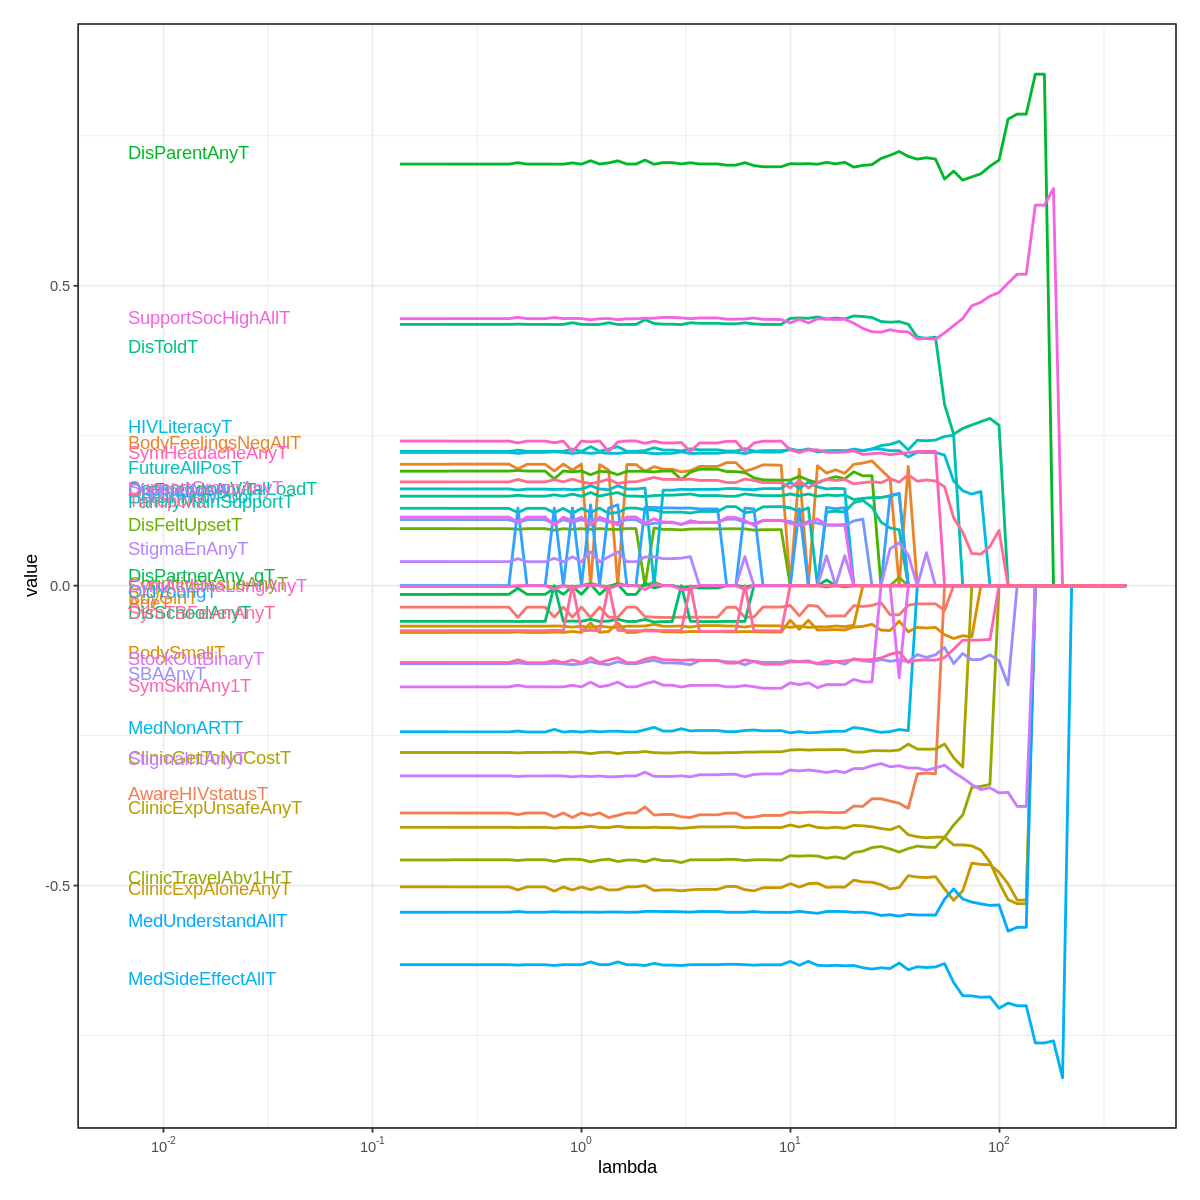

In [ ]:
# melt the data
tdf <- t(coefs_table)
colnames(tdf) <- tdf[1,]
tdf <- tdf[-1, ] 
rownames(tdf) <- c()

tdf <- cbind(tdf, lambda = lambdas)
tdf <- data.frame(tdf[,-1])
tdf <- sapply(tdf, as.numeric )
tdf <- data.frame(tdf)
tdf_melt <- melt(tdf ,  id.vars = 'lambda', variable.name = 'series')

# plot the data
options(repr.plot.width=10, repr.plot.height=10)
p1 = ggplot(tdf_melt) + 
  geom_line(aes(x = lambda, y = value, colour = series), size=0.8)
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  geom_text(data = subset(tdf_melt, lambda < (min(lambdas)+0.00001)), aes(label = series, colour = series, x = min(lambdas)*0.05, y = value), hjust = -0.3*0, vjust = 0.0, position=position_jitter(width=0.0,height=0.05)) +
  scale_colour_discrete(guide = 'none')  +  
  theme_bw() +  
  theme(plot.margin = unit(c(1,1,1,1), "lines"))
#ggsave(p, height = 7 , width = 7 * 3)

# Code to turn off clipping
gt <- ggplotGrob(p1)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

____

In [ ]:
glm_lasso <- glmmLasso(AdhLastWeekNewT ~ AgeT
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + BodyFeelingsNegAllT
                                    + ClinicExpAloneAnyT
                                    + ClinicExpUnsafeAnyT
                                    + ClinicGetToNoCostT
                                    + ClinicTravelAbv1HrT
                                    + CognitiveIssueAnyT
                                    + DisFeltUpsetT
                                    + DisFriendsAnyT
                                    + DisParentAnyT
                                    + DisPartnerAny_gT
                                    + DisSchoolAnyT
                                    + DoesntKnowViralLoadT
                                    + FutureAllPosT
                                    + HealthHowPoorT
                                    + MedSideEffectAllT
                                    + MedUnderstandAllT
                                    + OrphanAnyT
                                    + SBAAnyT
                                    + StigmaEnAnyT
                                    + SupportGroupAnyT
                                    + SupportSocHighAllT
                                    + SymAsthmaLungAnyT
                                    + SymHeadacheAnyT
                                    + SymSkinAny1T
                                    + SymTBFeverAnyT
                                    + FamilyMainSupportT
                                    + StigmaIntAnyT
                                    + DisToldT
                                    + HIVLiteracyT
                                    + AwareHIVstatusT
                                    + StockOutBinaryT
                                    + MedNonARTT
                                    + BodySmallT,
                                    rnd = list(ID=~1),  
                                    family = family, data = df_comp, lambda = 170, switch.NR=T,final.re=T,
                                    control=list())

In [ ]:
summary(glm_lasso)

Call:
glmmLasso(fix = AdhLastWeekNewT ~ AgeT + Timepoint + BoyGirlT + 
    OldYoungT + BodyFeelingsNegAllT + ClinicExpAloneAnyT + ClinicExpUnsafeAnyT + 
    ClinicGetToNoCostT + ClinicTravelAbv1HrT + CognitiveIssueAnyT + 
    DisFeltUpsetT + DisFriendsAnyT + DisParentAnyT + DisPartnerAny_gT + 
    DisSchoolAnyT + DoesntKnowViralLoadT + FutureAllPosT + HealthHowPoorT + 
    MedSideEffectAllT + MedUnderstandAllT + OrphanAnyT + SBAAnyT + 
    StigmaEnAnyT + SupportGroupAnyT + SupportSocHighAllT + SymAsthmaLungAnyT + 
    SymHeadacheAnyT + SymSkinAny1T + SymTBFeverAnyT + FamilyMainSupportT + 
    StigmaIntAnyT + DisToldT + HIVLiteracyT + AwareHIVstatusT + 
    StockOutBinaryT + MedNonARTT + BodySmallT, rnd = list(ID = ~1), 
    data = df_comp, lambda = 170, family = family, switch.NR = T, 
    final.re = T, control = list())


Fixed Effects:

Coefficients:
                      Estimate    StdErr z.value   p.value    
(Intercept)          -0.193889  0.044819 -4.3260 1.518e-05 ***
AgeT     

Lasso model with 3 variables


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Full GLM


Setting levels: control = 0, case = 1

Setting direction: controls < cases



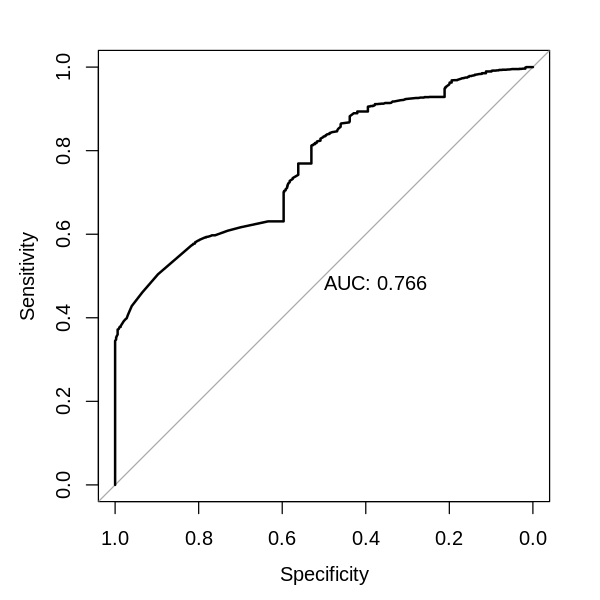

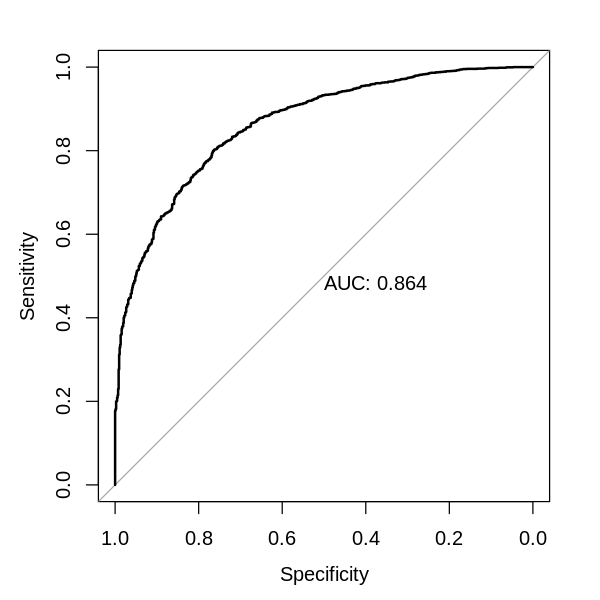

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
prob_lasso <- predict(glm_lasso, type=c("response"),)
prob_full <- predict(PQL_full_comp, type=c("response"),)

cat("Lasso model with 3 variables\n")
g_lasso <- roc(df_comp$AdhLastWeekNewT ~ prob_lasso, plot = TRUE, print.auc = TRUE)
cat("Full GLM\n")
g_full <- roc(df_comp$AdhLastWeekNewT ~ prob_full, plot = TRUE, print.auc = TRUE)

___

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



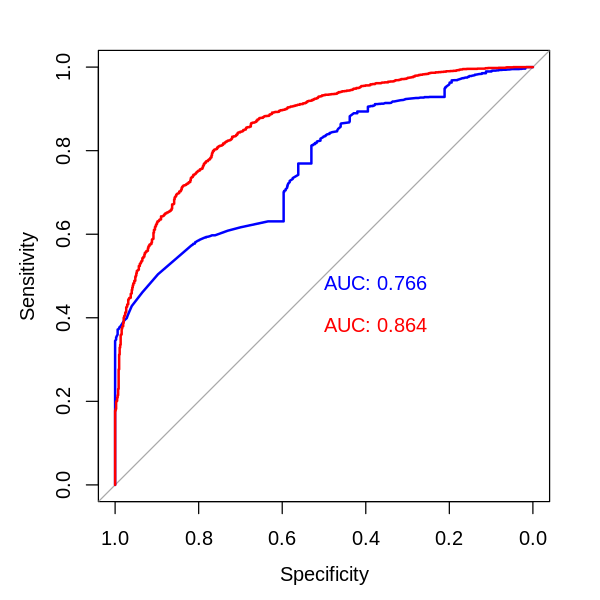

In [ ]:
library(pROC)
roc_rose <- plot(roc(df_comp$AdhLastWeekNewT, prob_lasso), print.auc = TRUE, col = "blue")
roc_rose <- plot(roc(df_comp$AdhLastWeekNewT, prob_full), print.auc = TRUE, 
                 col = "red", print.auc.y = .4, add = TRUE)

# GLMnet Lasso Model

Let us do a basic sensitivity check by disregarding (interpersonal) clustering. That is, we look into the problem from a purely cross-sectional point of view.

In [ ]:
x_ <- within(df_comp, rm(ID,Timepoint,AdhLastWeekNewT))
y <- df_comp$AdhLastWeekNewT
x <- as.matrix(sapply(x_, as.numeric))

Fit the model for 200 different lambdas in decreasing order.

In [ ]:
fit <- glmnet(x, y, family = "binomial", alpha = 1, nlambda = 200)

In [ ]:
print(fit)


Call:  glmnet(x = x, y = y, family = "binomial", alpha = 1, nlambda = 200) 

    Df %Dev   Lambda
1    0 0.00 0.076150
2    1 0.20 0.072710
3    1 0.38 0.069420
4    2 0.64 0.066280
5    2 0.91 0.063280
6    3 1.24 0.060420
7    3 1.56 0.057690
8    3 1.86 0.055080
9    3 2.12 0.052590
10   3 2.37 0.050210
11   4 2.59 0.047940
12   5 2.91 0.045770
13   7 3.23 0.043700
14   7 3.55 0.041720
15   7 3.85 0.039830
16   7 4.11 0.038030
17   7 4.36 0.036310
18   7 4.58 0.034670
19   7 4.78 0.033100
20   7 4.96 0.031610
21   7 5.13 0.030180
22   8 5.30 0.028810
23   8 5.45 0.027510
24   8 5.59 0.026260
25   9 5.72 0.025080
26  10 5.84 0.023940
27  11 5.97 0.022860
28  11 6.10 0.021820
29  12 6.22 0.020840
30  13 6.33 0.019900
31  15 6.45 0.019000
32  15 6.57 0.018140
33  15 6.68 0.017320
34  16 6.79 0.016530
35  16 6.89 0.015790
36  16 6.98 0.015070
37  16 7.07 0.014390
38  17 7.15 0.013740
39  19 7.25 0.013120
40  19 7.34 0.012520
41  20 7.43 0.011960
42  20 7.52 0.011420
43  20 7.60 0.01090

Get the best lambda by the means of cross-validation.

In [ ]:
cvfit <- cv.glmnet(x, y, family = "binomial", type.measure = "class")

In [ ]:
# Only 3 variables
sl = 0.052590
coef(cvfit, s = sl)
y_predicted = predict(cvfit, newx = x, type = "class", s = sl)

In [ ]:
# Best Cross-Validation Model
coef(cvfit, s = "lambda.min")

38 x 1 sparse Matrix of class "dgCMatrix"
                               s1
(Intercept)           0.223429288
AgeT                 -0.009010297
OldYoungT             .          
BoyGirlT             -0.006414173
BodyFeelingsNegAllT   .          
ClinicExpAloneAnyT   -0.441400383
ClinicExpUnsafeAnyT  -0.376611119
ClinicGetToNoCostT   -0.174733776
ClinicTravelAbv1HrT  -0.296388633
CognitiveIssueAnyT    .          
DisFeltUpsetT         .          
DisFriendsAnyT        0.026739990
DisParentAnyT         0.639092090
DisPartnerAny_gT      .          
DisSchoolAnyT         .          
DoesntKnowViralLoadT  0.091430421
FutureAllPosT         0.133840391
AwareHIVstatusT      -0.156757213
HealthHowPoorT        .          
MedSideEffectAllT    -0.594601139
MedUnderstandAllT    -0.448719777
OrphanAnyT            0.021172243
SBAAnyT              -0.112685802
StigmaEnAnyT          .          
SupportGroupAnyT      .          
SupportScaleT         0.002790621
SupportSocHighAllT    0.403718712
SymAst

## Plot Fit

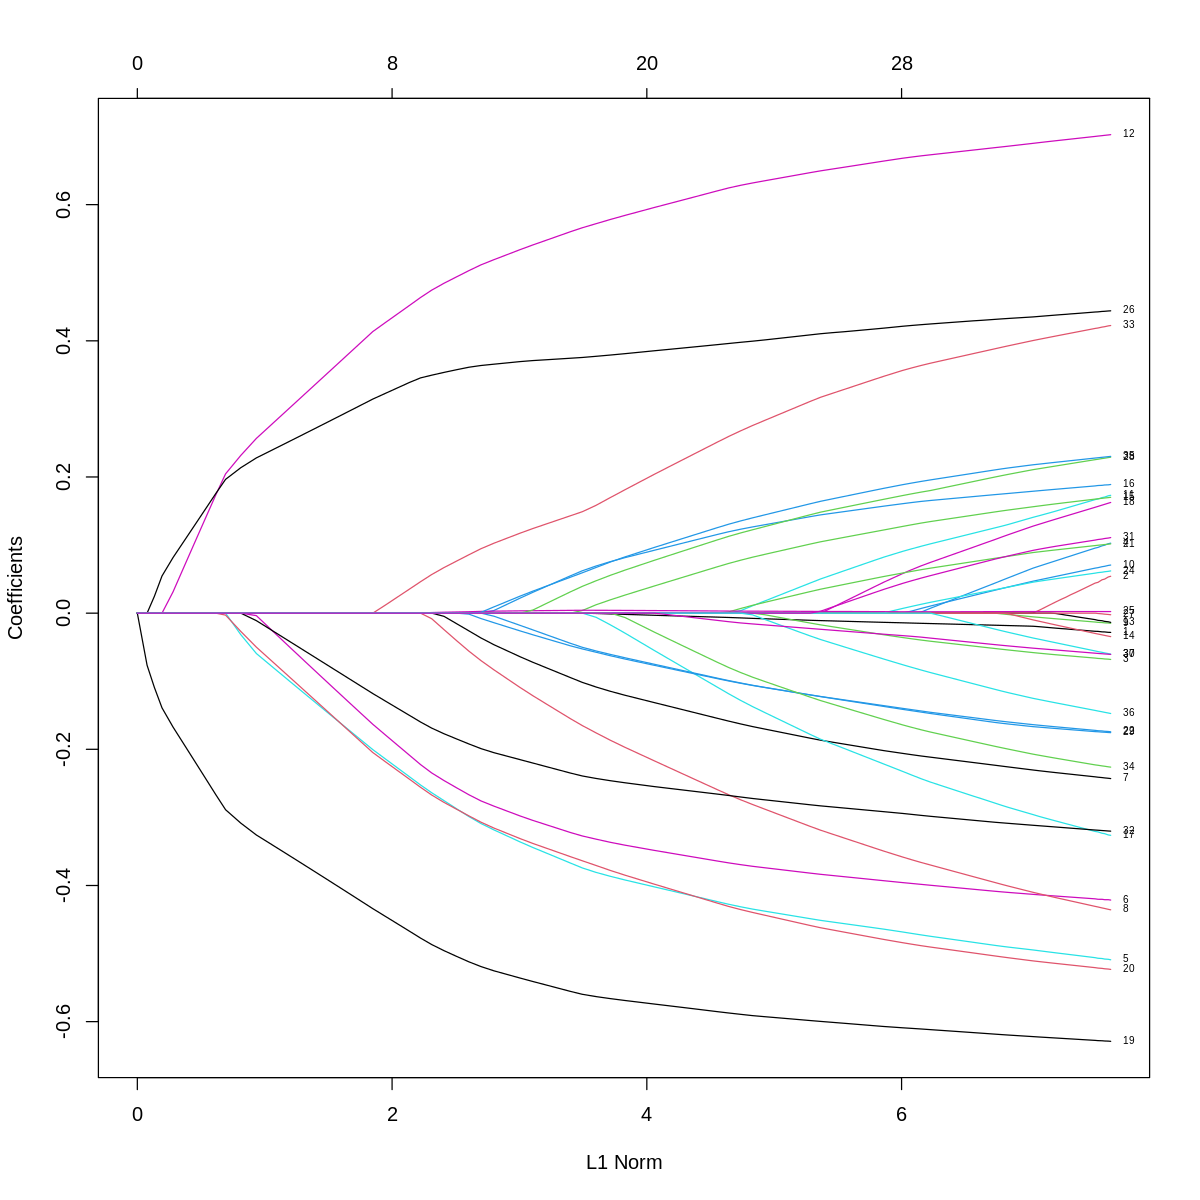

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
plot(fit, label = TRUE)

In [ ]:
cat("3 most important vars:\n")
dimnames(x)[2][[1]][c(18, 24, 11)]

3 most important vars:


[1] "HealthHowPoorT"   "SupportGroupAnyT" "DisFriendsAnyT"

## ROC curves and AUC as measures of goodness of fit


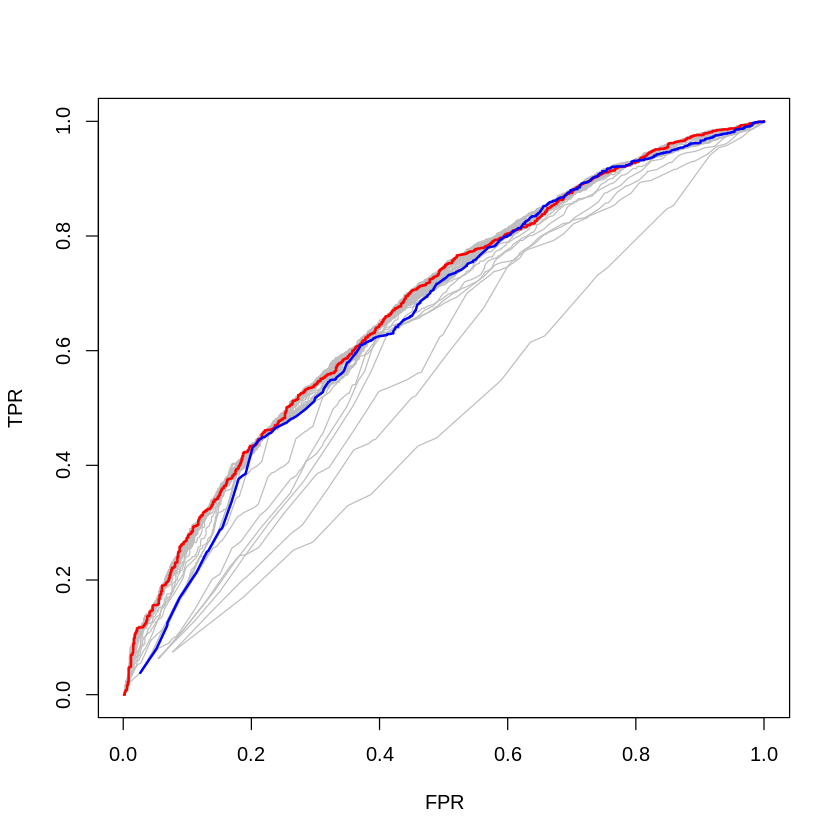

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)

cfit <- cv.glmnet(x, y, family = "binomial", type.measure = "auc",
                  keep = TRUE)
rocs <- roc.glmnet(cfit$fit.preval, newy = y)


best <- cvfit$index["min",]
plot(rocs[[best]], type = "l")
invisible(sapply(rocs, lines, col="grey"))
lines(rocs[[best]], lwd = 2,col = "red")
lines(rocs[[9]], lwd = 2,col = "blue")
legend(1, 95, legend=c("Line 1", "Line 2"),
       col=c("red", "blue"), lty=1:2, cex=0.8)